In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from skimage import filters
from skimage.filters import gaussian
from skimage import morphology
from skimage.color import rgb2gray
from skimage.color import rgb2hsv

import sys

from prep_image import prep_im

In [8]:
imgs_path = '..' + os.sep + 'images' + os.sep + 'img' + os.sep
#imgs_path = '..' + os.sep + 'images' + os.sep + 'mask' + os.sep

## Functions for mask generation

In [9]:
def generate_mask(im):
    im = rgb2gray(im)*256
    
    val = filters.threshold_otsu(im)
    im_mask = im < val
    
    struct_el = morphology.disk(3)
    
    im_mask = morphology.binary_opening(im_mask, struct_el)
    
    return im_mask

In [10]:
def generate_rgb_mask(im):
    val0 = filters.threshold_otsu(im[:,:,0]*256)
    val1 = filters.threshold_otsu(im[:,:,1]*256)
    val2 = filters.threshold_otsu(im[:,:,2]*256)

    im_mask = (gaussian(im[:,:,0]*256,1)<val0) & (gaussian(im[:,:,2]*256,1)<val2) 
    
    struct_el = morphology.disk(3)
    im_mask = morphology.binary_opening(im_mask, struct_el)
    
    return im_mask

In [11]:
def generate_gaussian_mask(im):
    im = gaussian(rgb2gray(im)*256, 3)
    
    val = filters.threshold_otsu(im)
    im_mask = im < val
    
    struct_el = morphology.disk(3)
    
    im_mask = morphology.binary_opening(im_mask, struct_el)
    
    return im_mask

In [12]:
def generate_hue_mask(im):
    hsv_im = rgb2hsv(im)
    hue_im = hsv_im[:,:,0]*256
    val_hue = filters.threshold_otsu(hue_im)

    im_hue_mask = (gaussian(hue_im,2) > val_hue)

    struct_el = morphology.disk(3)
    im_hue_mask = morphology.binary_opening(im_hue_mask, struct_el)

    return im_hue_mask

## Automatic segmentation

In [13]:
img_id_1 = 'PAT_109_868_723.png'
im1 = prep_im(img_id_1, imgs_path)

img_id_2 = 'PAT_46_880_140.png'
im2 = prep_im(img_id_2, imgs_path)

img_id_3 = 'PAT_894_1679_640.png'
im3 = prep_im(img_id_3, imgs_path)

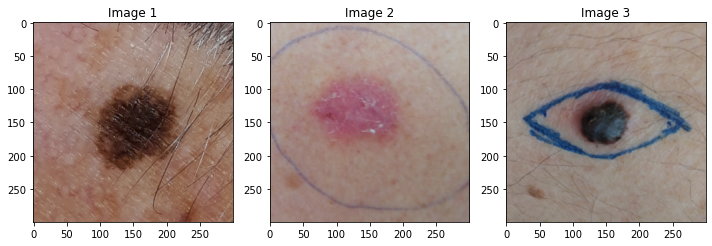

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axes[0].imshow(im1)
axes[1].imshow(im2)
axes[2].imshow(im3)
axes[0].title.set_text('Image 1')
axes[1].title.set_text('Image 2')
axes[2].title.set_text('Image 3')
fig.tight_layout()

In [15]:
mask_1 = generate_mask(im1)
mask_rgb_1 = generate_rgb_mask(im1)
mask_g_1 = generate_gaussian_mask(im1)
mask_hue_1 = generate_hue_mask(im1)

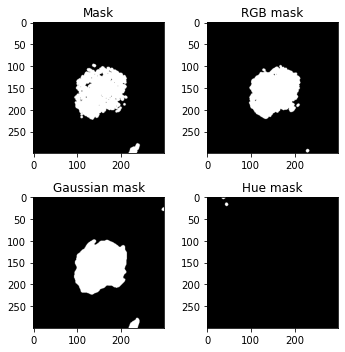

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
axes[0][0].imshow(mask_1, cmap='gray')
axes[0][1].imshow(mask_rgb_1, cmap='gray')
axes[1][0].imshow(mask_g_1, cmap='gray')
axes[1][1].imshow(mask_hue_1, cmap='gray')
axes[0][0].title.set_text('Mask')
axes[0][1].title.set_text('RGB mask')
axes[1][0].title.set_text('Gaussian mask')
axes[1][1].title.set_text('Hue mask')
fig.tight_layout()

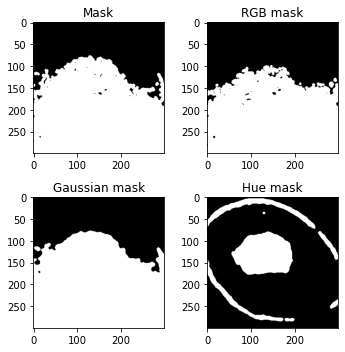

In [17]:
mask_2 = generate_mask(im2)
mask_rgb_2 = generate_rgb_mask(im2)
mask_g_2 = generate_gaussian_mask(im2)
mask_hue_2 = generate_hue_mask(im2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
axes[0][0].imshow(mask_2, cmap='gray')
axes[0][1].imshow(mask_rgb_2, cmap='gray')
axes[1][0].imshow(mask_g_2, cmap='gray')
axes[1][1].imshow(mask_hue_2, cmap='gray')
axes[0][0].title.set_text('Mask')
axes[0][1].title.set_text('RGB mask')
axes[1][0].title.set_text('Gaussian mask')
axes[1][1].title.set_text('Hue mask')
fig.tight_layout()

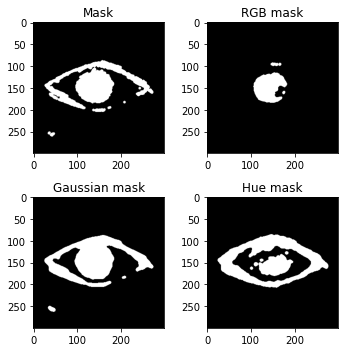

In [18]:
mask_3 = generate_mask(im3)
mask_rgb_3 = generate_rgb_mask(im3)
mask_g_3 = generate_gaussian_mask(im3)
mask_hue_3 = generate_hue_mask(im3)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
axes[0][0].imshow(mask_3, cmap='gray')
axes[0][1].imshow(mask_rgb_3, cmap='gray')
axes[1][0].imshow(mask_g_3, cmap='gray')
axes[1][1].imshow(mask_hue_3, cmap='gray')
axes[0][0].title.set_text('Mask')
axes[0][1].title.set_text('RGB mask')
axes[1][0].title.set_text('Gaussian mask')
axes[1][1].title.set_text('Hue mask')
fig.tight_layout()